In [1]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import yfinance as yf

In [2]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
START_DATE = '2022-09-21'
END_DATE = '2024-5-29'
ASSET = ['AAPL','TSLA', 'MSFT',"NVDA","GOOGL","AMZN","META"]
prices_df = yf.download(ASSET,start = START_DATE,end = END_DATE)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df.head()


[*********************100%%**********************]  7 of 7 completed

Downloaded 423 rows of data.


Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2022-09-21  152.211456  118.540001   99.279999  141.969360  235.323853   
2022-09-22  151.241058  117.309998  100.139999  142.668640  237.323059   
2022-09-23  148.953735  113.779999   98.739998  140.261185  234.309479   
2022-09-26  149.290421  115.150002   98.169998  136.225464  233.846619   
2022-09-27  150.270691  114.410004   97.500000  134.257538  232.822403   

Price                                    Close                          ...  \
Ticker            NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                    ...   
2022-09-21  132.511063  300.799988  153.720001  118.540001   99.279999  ...   
2022-09-22  125.516289  288.589996  152.740005  117.309998  100.139999  ...   
2022-09-23  125.066635  275.329987  150.429993  113.779999   98.739998  ...   
2022-09-26  122.188766  276.010010  150.770004  115.150002   98.169998  ...   
2022-09-27  124.037384  282.940002  151.759995  114.410004   97.500000  ...   

Price             Open                             Volume                      \
Ticker            MSFT        NVDA        TSLA       AAPL      AMZN     GOOGL   
Date                                                                            
2022-09-21  244.270004  132.130005  308.290009  101696800  58498900  31487300   
2022-09-22  237.869995  130.699997  299.859985   86652500  55229200  34298600   
2022-09-23  239.539993  124.199997  283.089996   96029900  65126700  31625400   
2022-09-26  237.050003  124.910004  271.829987   93339400  62723300  27072700   
2022-09-27  239.979996  125.070000  283.839996   84442700  60094700  30072800   

Price                                               
Ticker          META      MSFT      NVDA      TSLA  
Date                                                
2022-09-21  38338600  28625600  80767900  62555700  
2022-09-22  34418500  31061200  75916200  70545400  
2022-09-23  31710700  34176000  66330900  63748400  
2022-09-26  30497000  27694200  54734300  58076900  
2022-09-27  30826500  27018700  55385400  61925200  

[5 rows x 42 columns]

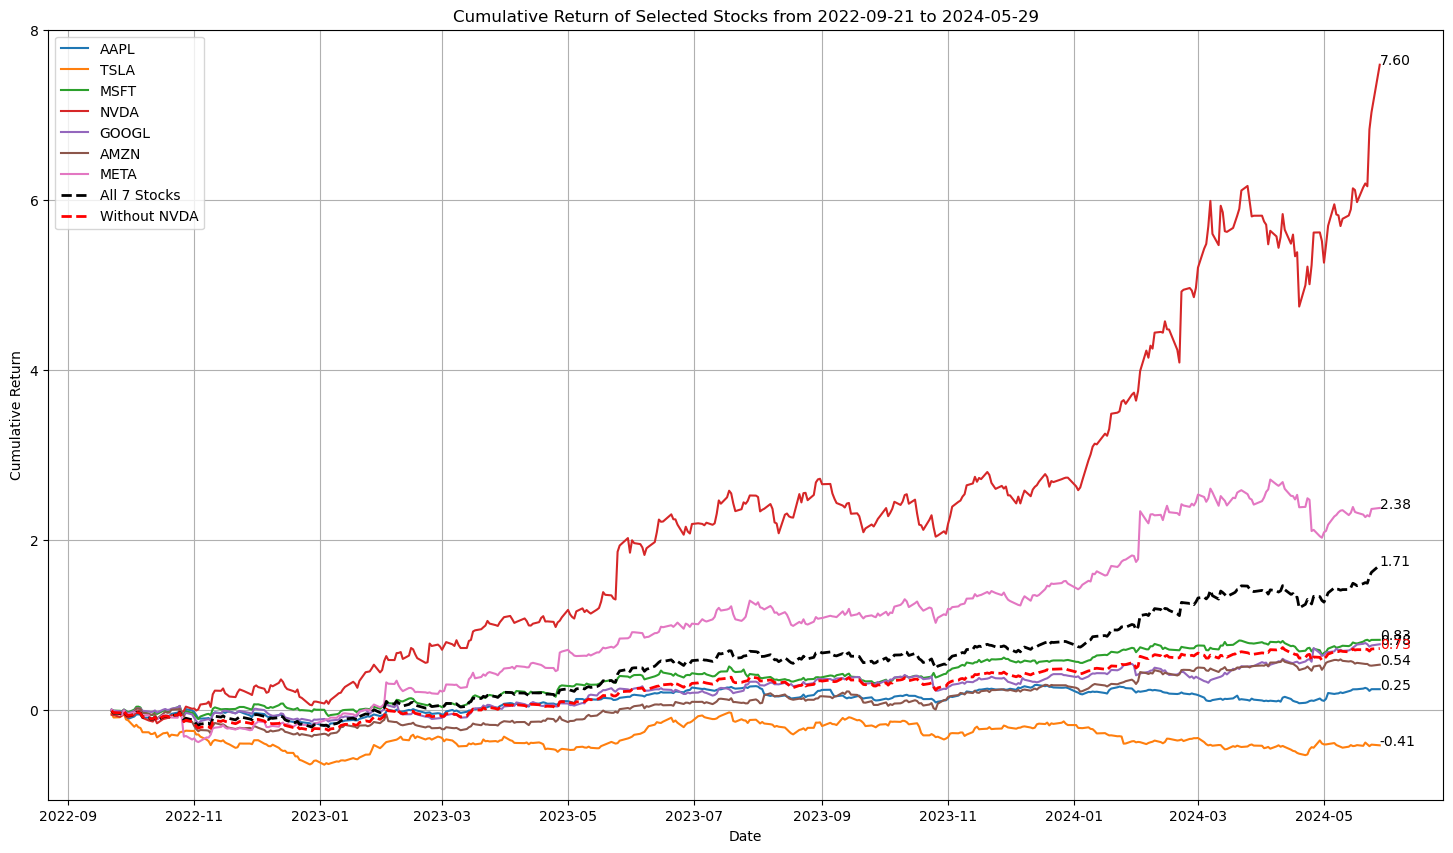

In [18]:

# Calculate the cumulative return for each stock
cumulative_return = (1 + daily_return).cumprod() - 1

# Calculate the cumulative return for all 7 stocks equally weighted
all_7_return = cumulative_return.mean(axis=1)

# Calculate the cumulative return for 6 stocks without NVIDIA equally weighted
without_nvda_return = cumulative_return.drop(columns=['NVDA']).mean(axis=1)
plt.figure(figsize=(18, 10))
for stock in ASSET:
    plt.plot(cumulative_return.index, cumulative_return[stock], label=stock)

plt.plot(all_7_return.index, all_7_return, label='All 7 Stocks', linestyle='--', color='black', linewidth=2)
plt.plot(without_nvda_return.index, without_nvda_return, label='Without NVDA', linestyle='--', color='red', linewidth=2)

# Label the final cumulative returns numerically
for stock in ASSET:
    plt.text(cumulative_return.index[-1], cumulative_return[stock].iloc[-1], f'{cumulative_return[stock].iloc[-1]:.2f}')

plt.text(all_7_return.index[-1], all_7_return.iloc[-1], f'{all_7_return.iloc[-1]:.2f}', color='black')
plt.text(without_nvda_return.index[-1], without_nvda_return.iloc[-1], f'{without_nvda_return.iloc[-1]:.2f}', color='red')

plt.title('Cumulative Return of Selected Stocks from 2022-09-21 to 2024-05-29')

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

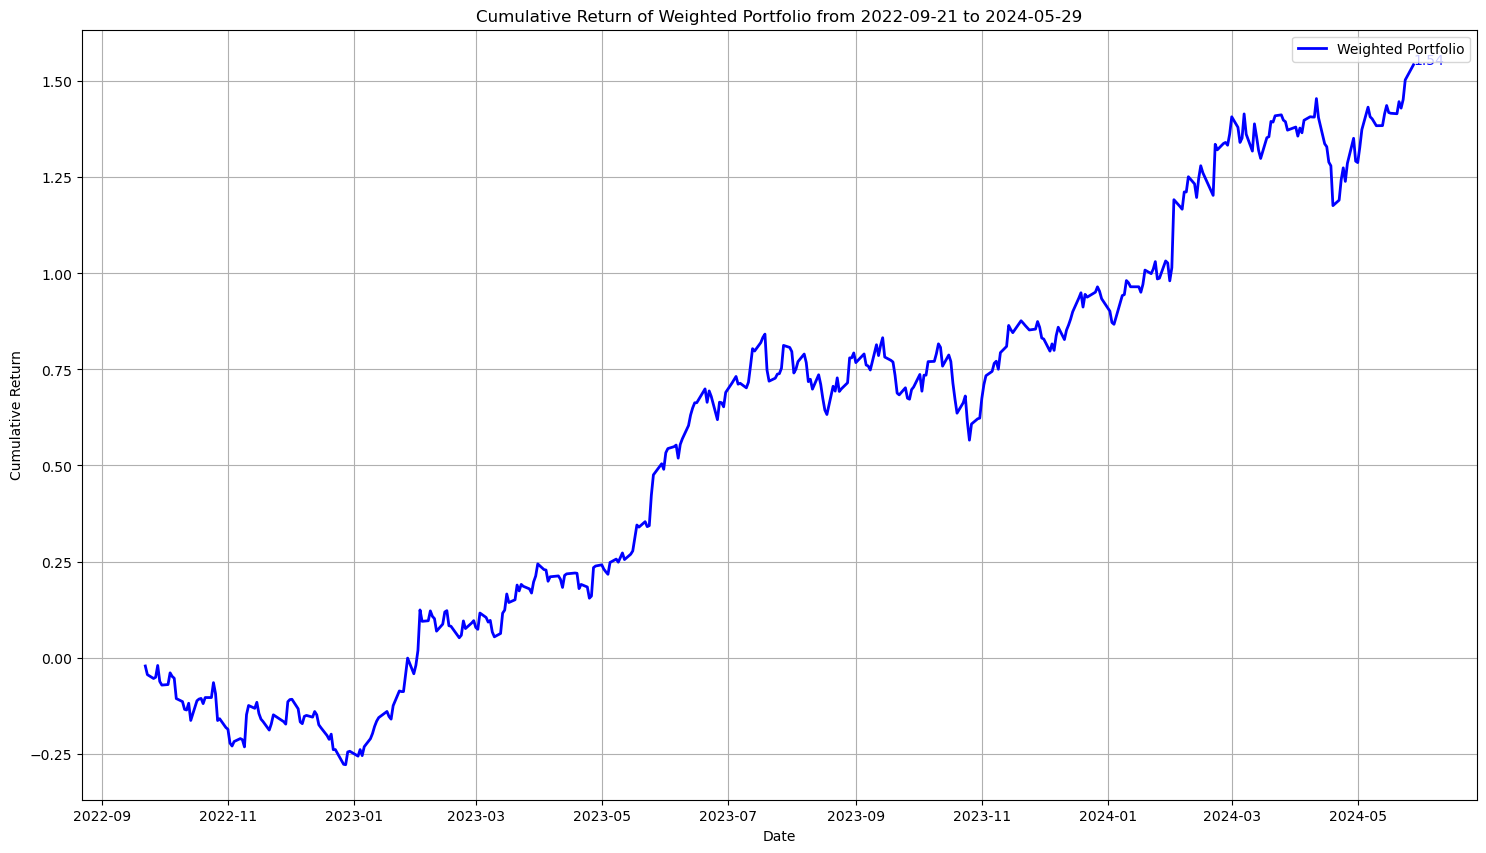

In [20]:

# Define the weights for the portfolio
weights = {
    'AAPL': 0.0293,
    'TSLA': 0.2171,
    'MSFT': 0.0001,
    'NVDA': 0.2294,
    'GOOGL': 0.0032,
    'AMZN': 0.2261,
    'META': 0.2948
}

# Calculate the weighted return
weighted_return = daily_return.dot(pd.Series(weights))

# Calculate cumulative return
cumulative_weighted_return = (1 + weighted_return).cumprod() - 1

# Plot the cumulative return
plt.figure(figsize=(18, 10))
plt.plot(cumulative_weighted_return.index, cumulative_weighted_return, label='Weighted Portfolio', linestyle='-', color='blue', linewidth=2)

# Label the final cumulative return numerically
plt.text(cumulative_weighted_return.index[-1], cumulative_weighted_return.iloc[-1], f'{cumulative_weighted_return.iloc[-1]:.2f}', color='blue')

plt.title('Cumulative Return of Weighted Portfolio from 2022-09-21 to 2024-05-29')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

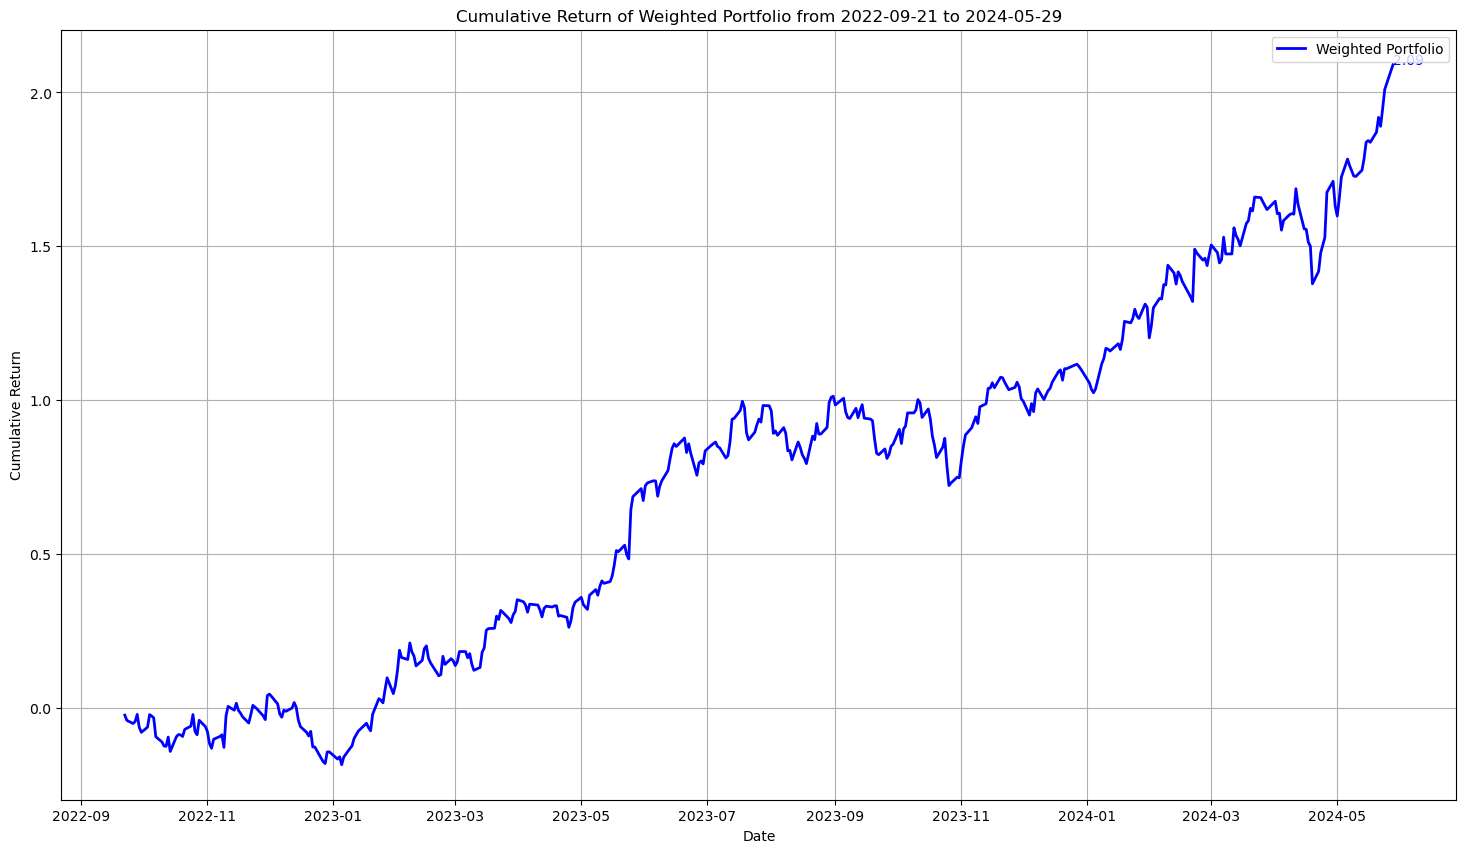

In [24]:

# Define the weights for the portfolio
weights = {
    'TSLA': 0.1563,
    'AAPL': 0.1091,
    'GOOGL': 0.3274,
    'MSFT': 0.1880,
    'NVDA': 0.3737,
    'AMZN': 0.0011,
    'META': 0.0137 
}

# Calculate the weighted return
weighted_return = daily_return.dot(pd.Series(weights))

# Calculate cumulative return
cumulative_weighted_return = (1 + weighted_return).cumprod() - 1

# Plot the cumulative return
plt.figure(figsize=(18, 10))
plt.plot(cumulative_weighted_return.index, cumulative_weighted_return, label='Weighted Portfolio', linestyle='-', color='blue', linewidth=2)

# Label the final cumulative return numerically
plt.text(cumulative_weighted_return.index[-1], cumulative_weighted_return.iloc[-1], f'{cumulative_weighted_return.iloc[-1]:.2f}', color='blue')

plt.title('Cumulative Return of Weighted Portfolio from 2022-09-21 to 2024-05-29')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()